## CSE482 Exercise3

#### Name: Yuhan Zhu

### Queston 1. 
You will use the wiki_edit.txt file from Exercise 1. Make sure the data file is in the directory where you will be writing your python code.

✅ **Named this notebook file `exercise3.ipynb` and `wiki_edit.txt` is in the same directory as this Jupyter notebook.**

### Question 2. 
Write a python script using the mysql-connector library to performs the following steps:

In [7]:
#pip install mysql_connector_python==8.0.29

In [10]:
from mysql.connector import errorcode
import mysql.connector

**a.** Open a connection to the CSE database server (mysql-user-cse.egr.msu.edu). Your
username and database name is the same as your MSU NetID. If you’re using the database for the first time, the password is your student PID. Note: if you can’t access the database server from outside the campus, you may need to use the EGR VPN or do the exercise on campus. Please refer to our announcement on d2l (on Sep 19) for further information.

In [12]:
con = mysql.connector.connect(user='zhuyuha3', password='Zhuyuhan6'
                              ,host='mysql-user.cse.msu.edu',database='zhuyuha3')

✅ **Connected with CSE database server**

✅**b.** Create a table named Wiki_Edit, which contains the following schema: RevisionID: int Primary Key ArticleName: varchar(100) EditDate: date UserName: varchar(50)

In [3]:
cursor = con.cursor()
query = "DROP TABLE IF EXISTS Wiki_Edit"
cursor.execute(query)

query = """CREATE TABLE IF NOT EXISTS Wiki_Edit (RevisionID int PRIMARY KEY,
            ArticleName varchar(100),EditDate date,UserName varchar(50))
        """
    
cursor.execute(query)
cursor.close()
con.commit()
con.close()

Here's how it looks like from the web interferance ⬇️

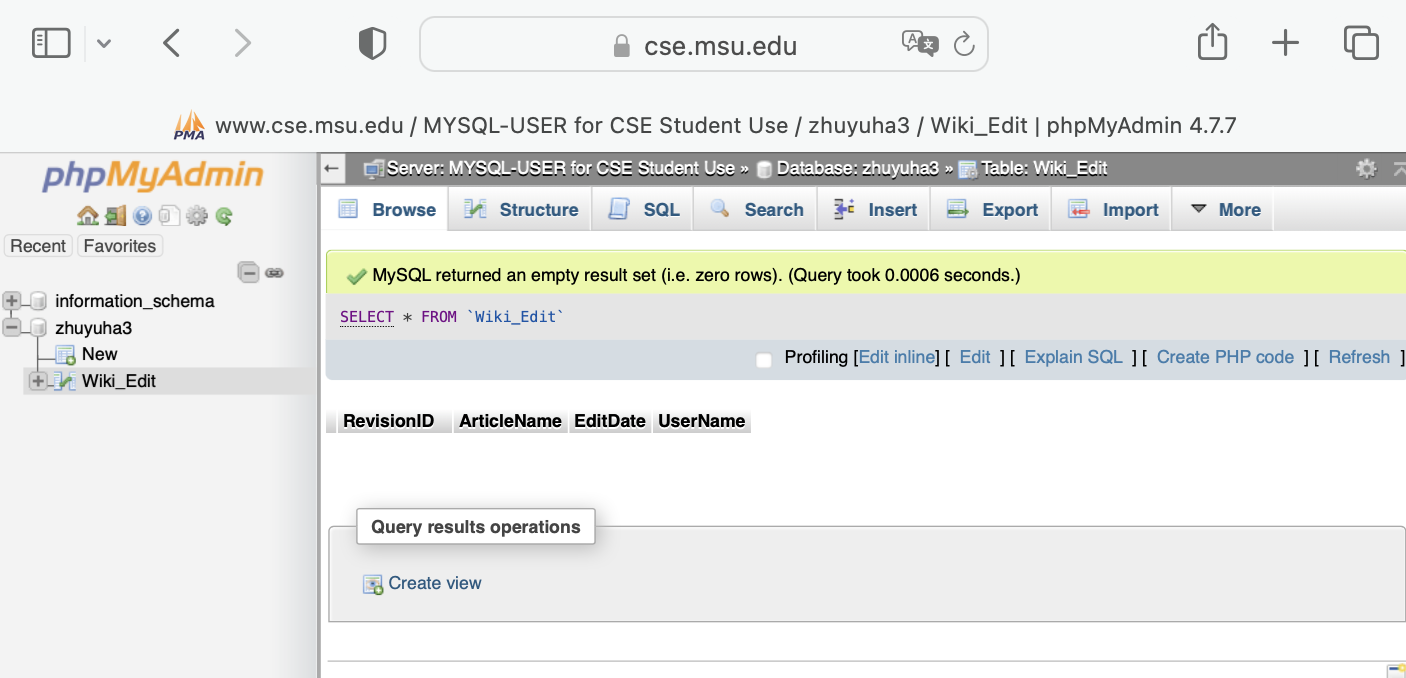

**c.** Read the file wiki_edit.txt and parse each line to identify the individual fields. For this exercise, do not use the read_table and DataFrame approach shown in lecture 4. Instead, you should read the file directly, parse each line, and store the fields from each line into the database. You should refer to the example given in slide #16 in lecture 2 on how to read from the data file directly and split each line into the individual fields.

In [122]:
with open("wiki_edit.txt", "r") as f:
    
    data = []
    for line in f:
        data.append(line.strip().split(","))

#data

In [121]:


def byUnicode(char):
    if ord(char) < 48 or ord(char) > 127: return ''
    else: return char
    
con = mysql.connector.connect(user='zhuyuha3', password='Zhuyuhan6'
                              ,host='mysql-user.cse.msu.edu',database='zhuyuha3')
cursor = con.cursor()
    
for row in data2:
    Uid = row[0]
    Article = ''.join(list(filter(byUnicode, row[1])))
    Article = Article[:100]
    EditDate = row[2]
    EditDate = EditDate[:100]
    UserName = row[3]
    UserName = UserName[:100]
    if index < 100:
        query = "INSERT INTO Wiki_Edit VALUES (" + str(rid) + ",'" 
        query += Article + "','" + EditDate + "','"+ UserName + "')"""
        cursor.execute(query)
        
con.commit()
cursor.close()
con.close()

IndexError: list index out of range

**I really struggale with this question by not using `Pandas` `DataFrame` to indexing the columns to add the data to MySQL, I will skip this part for now and just use Pandas to insert the value. I will definately spend more time on this question later.**

Some ideas are: 
1. using apply() function to iterate rows. 
2. adding the name to the columns. 
3. Use numpy. 
4. Using loops.

...

In [9]:
# Using Pandas to solve this problem.
import pandas as pd

column_names = ['RevisionId','ArticleId','Timestamp','Editor']

data = pd.read_table("wiki_edit.txt", sep=' ', header=None, names=column_names)

In [128]:
def byUnicode(char):
    if ord(char) < 48 or ord(char) > 127: return ''
    else: return char
    
    
con = mysql.connector.connect(user='zhuyuha3', password='Zhuyuhan6'
                              ,host='mysql-user.cse.msu.edu',database='zhuyuha3')
cursor = con.cursor()
    
for index, row in data.iterrows():
    rid = row['RevisionId']
    Article = ''.join(list(filter(byUnicode, row['ArticleId'])))
    EditDate = row['Timestamp']
    User = row['Editor']
    if index < 100:
        query = "INSERT INTO Wiki_Edit VALUES (" + str(rid) + ",'" 
        query += Article + "','" + EditDate + "','"+ User + "')"""
        cursor.execute(query)
        
con.commit()
cursor.close()
con.close()

✅**d.** Query the database to find the Article name with largest number of edits.

In [3]:
con = mysql.connector.connect(user='zhuyuha3', password='Zhuyuhan6'
                              ,host='mysql-user.cse.msu.edu',database='zhuyuha3')

cursor = con.cursor()

In [5]:
#pip install collection

In [4]:
from collections import Counter


query = """SELECT ArticleName FROM Wiki_Edit"""

cursor.execute(query)

cont = Counter(cursor)
print (cont.most_common(5)) 


cursor.close()
con.close()

[(('Abraham_Lincoln',), 11), (('Albert_Einstein',), 7), (('Alchemy',), 5), (('Alexander_the_Great',), 5), (('Anime',), 5)]


✅**e.** NOTE: you can only connect to the CSE database server if you’re on the EGR network. Try to
do the exercise on campus. Otherwise, you need to install mysql on your own laptop.

### Question 3. 
Install MongoDB to your machine.

✅**a.** Launch the MongoDB server.

✅**b.** Using pymongo, write an Jupyter notebook script that will store the entries in the
wiki_edit.txt file to a collection named wiki in MongoDB. To store the data, you need to convert each line into a dictionary object. The keys to the dictionary correspond to RevisionID, ArticleName, EditDate, and UserName and the values correspond to the individual entries in each line of the file:
columns = line.strip().split(‘ ‘)
record = { ‘RevisionID’: columns[0], ...., ‘UserName’: columns[3]} db.wiki.insert_one(record)

In [3]:
import pandas as pd

column_names = ['RevisionId','ArticleId','Timestamp','Editor']

data = pd.read_table("wiki_edit.txt", sep=' ', header=None, names=column_names)

In [4]:
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017")
mydb = myclient["exercise3"]
mycol = mydb['wiki']

In [7]:
mongo_docs = []
for ind in data.index:
    record = { "RevisionID": str(data["RevisionId"][ind]), 
               "ArticleName": data["ArticleId"][ind], 
               "EditDate": data["Timestamp"][ind],
               "UserName": data["Editor"][ind]}
    mongo_docs += [record]

mycol.insert_many(mongo_docs)

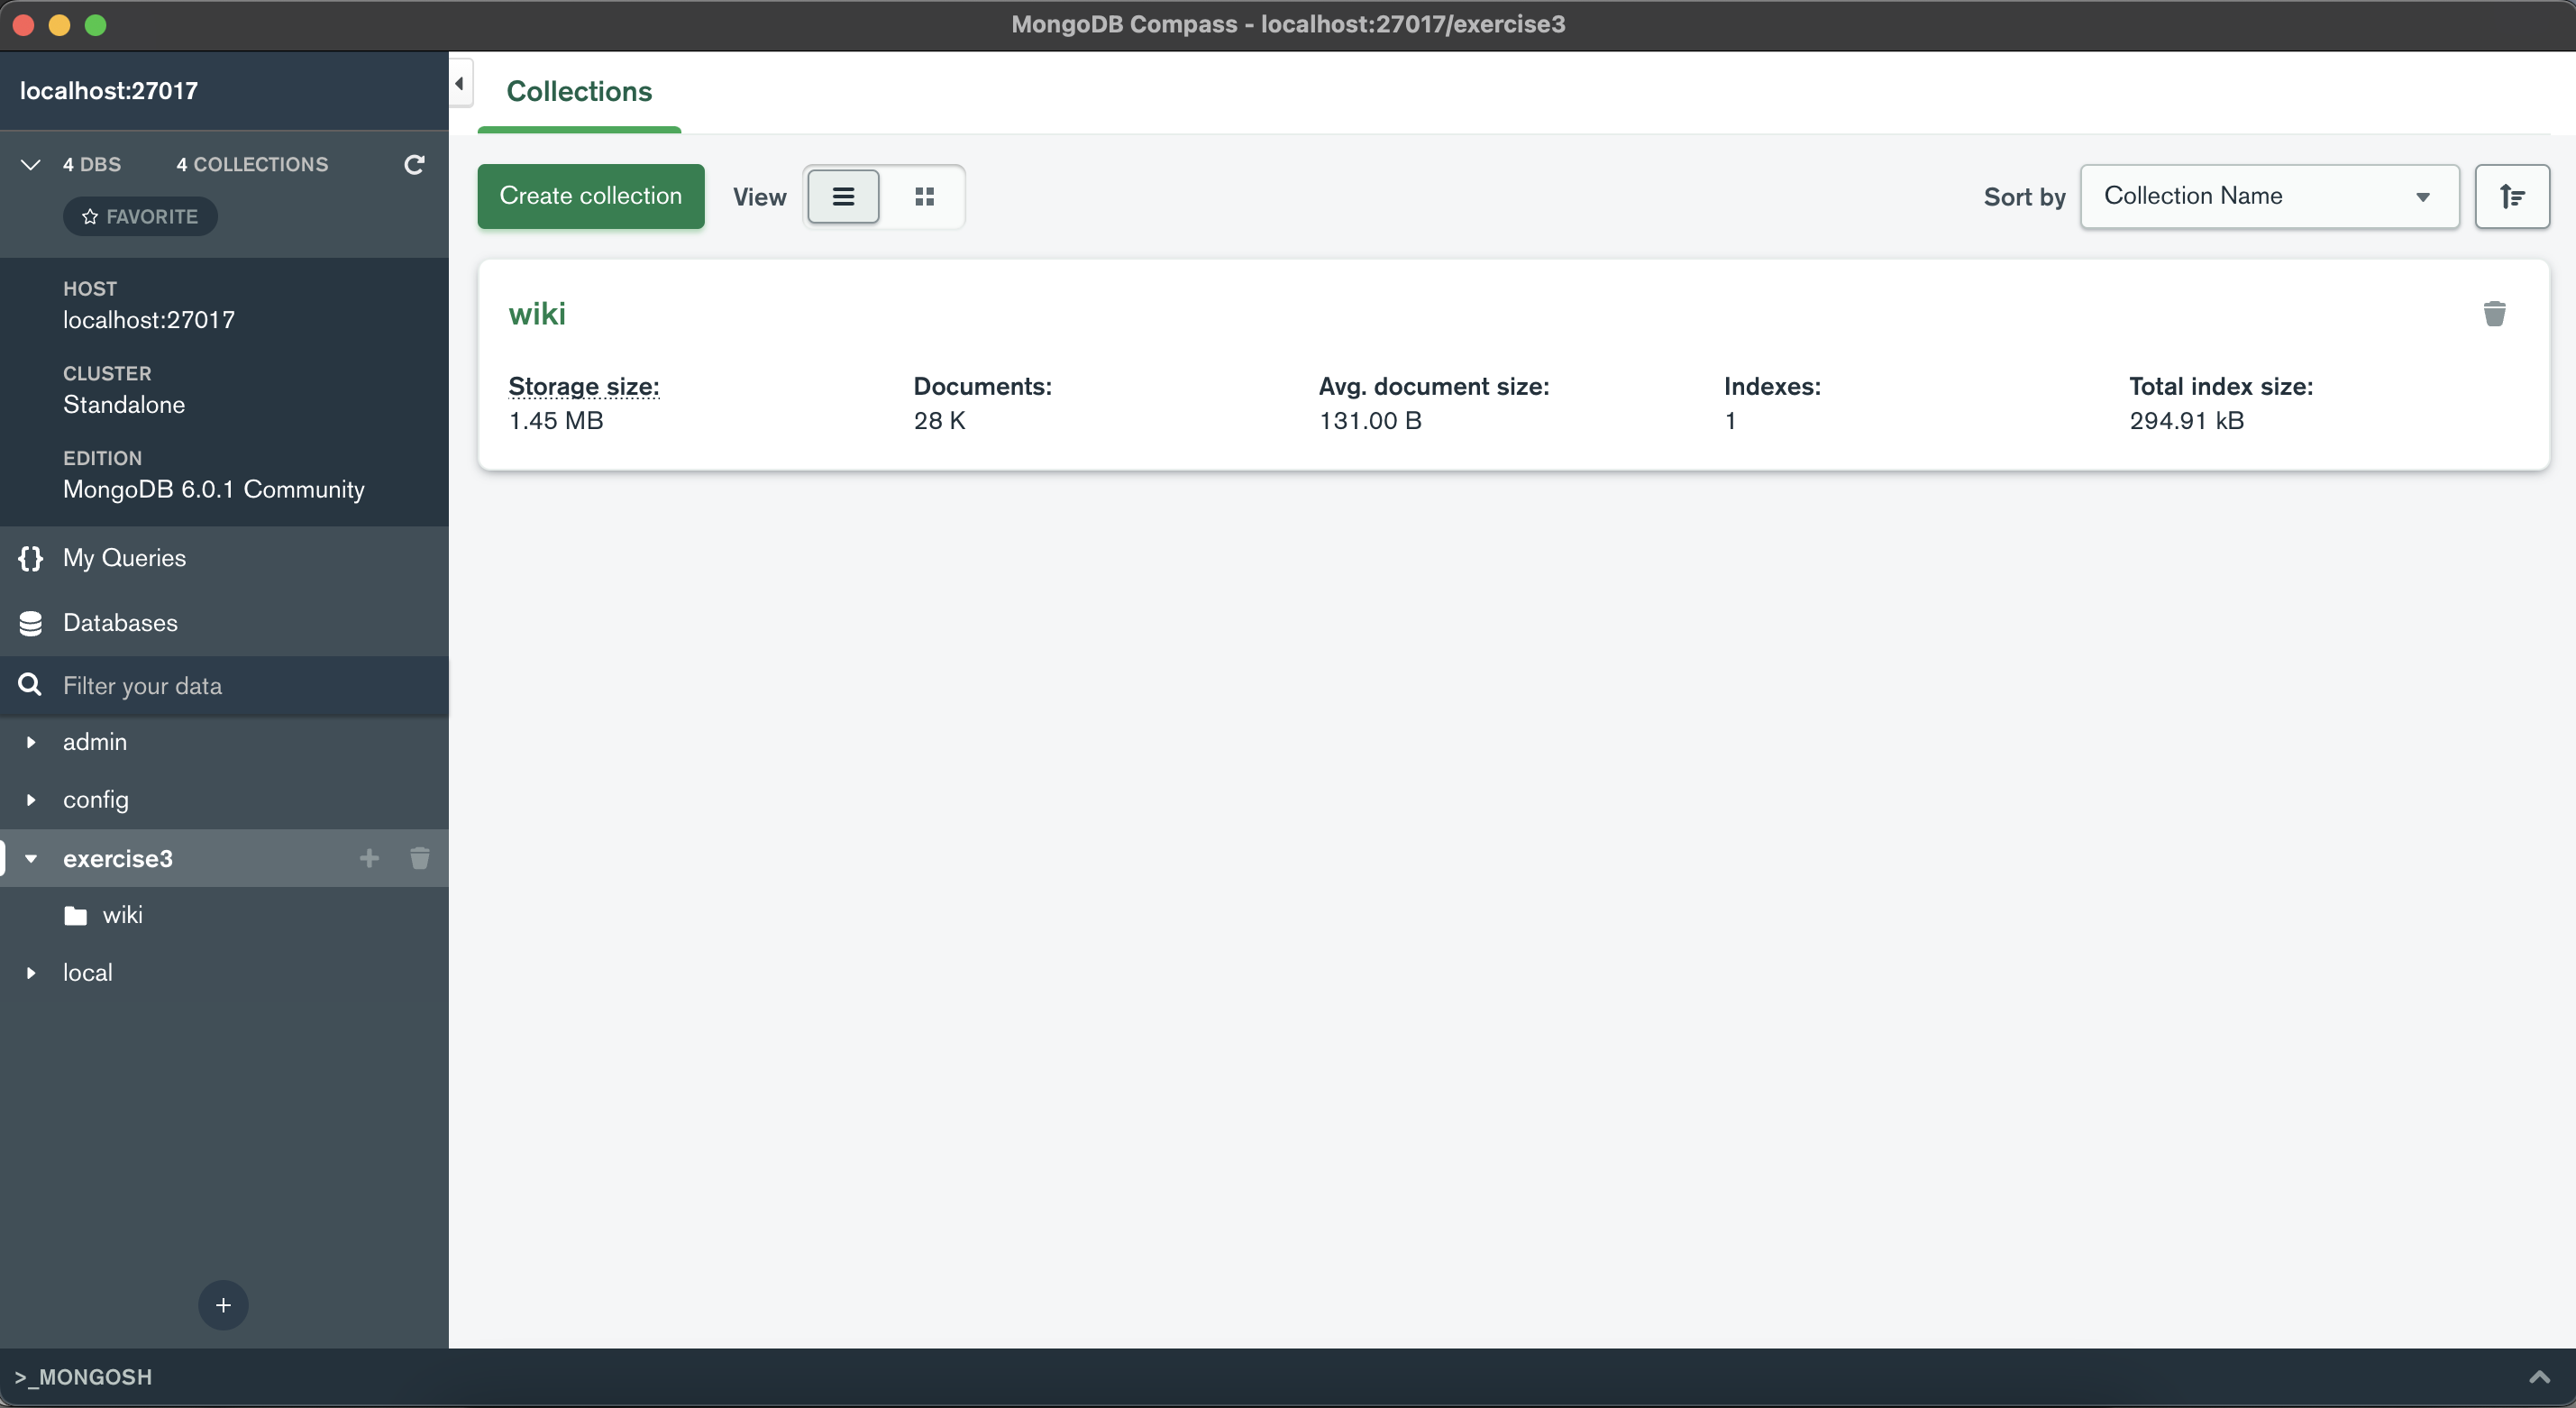

✅**c.** Write a query to find the date and username of editors who edited the “Anarchism” article: revisions = db.wiki
for line in revisions.find({"ArticleName": "Anarchism"}): print line["EditDate"], line["UserName"]

In [8]:
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["exercise3"]
mycol = mydb["wiki"]

revisions = mycol

for line in revisions.find({"ArticleName": "Anarchism"}):
    print(line["EditDate"], line["UserName"])

2005-01-01 ip:24.136.172.37
2005-01-03 ip:137.53.22.23
2005-01-03 ip:24.42.90.254
2005-01-06 ip:69.61.184.201
